# Graphs by Korets Khrystyna

In [7]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby

In [8]:
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.spring_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

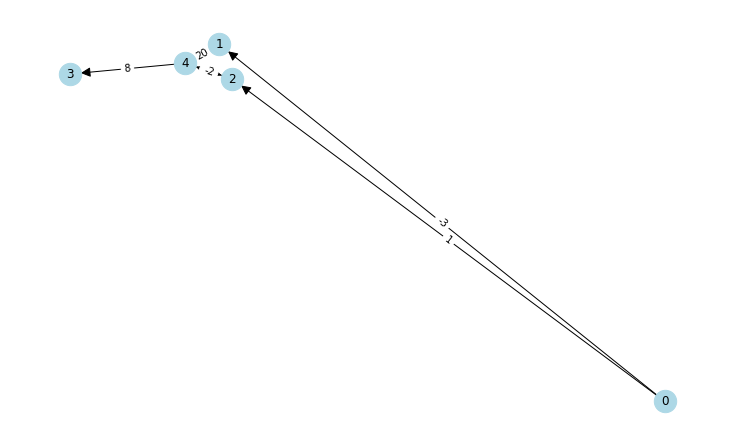

In [143]:
G = gnp_random_connected_graph(5, 0.5, True, True)

## Floyd-Warshall algorithm

In [107]:
from networkx.algorithms import floyd_warshall_predecessor_and_distance

In [108]:
try:
    pred, dist = floyd_warshall_predecessor_and_distance(G) 
    for k, v in dist.items():
        print(f"Distances with {k} source:", dict(v))
except:
    print("Negative cycle detected")

Distances with 0 source: {0: 0, 88: -300034510290086904870, 1: 0, 3: -300034376314482567858, 4: -300034376314482566725, 8: -300034376314482567840, 10: -300034376314482566705, 11: -300034376314482567846, 12: -300034376314482567863, 14: -300034376314482567860, 16: -300034376314482567857, 17: -300034376314482567866, 19: -300034376314482567852, 20: -300034376314482567862, 22: -300034376314482567864, 24: -300034376314482567863, 25: -300034376314482567867, 26: -300034376314482567870, 29: -300034376314482567865, 32: -300034376314482567868, 34: -300034376314482567873, 36: -300034376314482567876, 38: -300034376314482567878, 39: -300034376314482567871, 40: -300034376314482567876, 41: -300034376314482567872, 42: -300034376314482567878, 43: -300034376314482567869, 46: -300034376314482567886, 48: -300034376314482567875, 50: -300034376314482567885, 59: -300034376314482937897, 60: -300034376314482937885, 62: -300034376314482937896, 68: -300034376314962095150, 69: -300034376314962095151, 70: -30003437

In [146]:
def floyd_warshall_(graph):
    edges = list(graph.edges(data=True))
    edge = []
    for i in edges:
        edge.append(i[0:2] + (i[2]['weight'],))
    vertices = max(max(i[0], i[1]) for i in edge) + 1  # Increment by 1
    dist = [[float('inf')] * vertices for _ in range(vertices)]  # creating matrix with inf values
    for i in range(vertices):
        dist[i][i] = 0  # set zero to path that start and end in one point
    for j in edge:
        dist[j[0]][j[1]] = j[-1]  # set weight of each path
    for t in range(vertices):
        for i in range(vertices):
            for j in range(vertices):
                dist[i][j] = min(dist[i][j], dist[i][t] + dist[t][j])
    return dist

In [147]:
path = []
for i in floyd_warshall_(G):
    a = {}
    for j in range(len(i)):
        a[j] = i[j]
    path.append(a)
for i, el in enumerate(path):
    print(f"Distances with {i} source: {el}")


Distances with 0 source: {0: 0, 1: -3, 2: 1, 3: 20, 4: 12}
Distances with 1 source: {0: inf, 1: 0, 2: 18, 3: 28, 4: 20}
Distances with 2 source: {0: inf, 1: inf, 2: 0, 3: 19, 4: 11}
Distances with 3 source: {0: inf, 1: inf, 2: inf, 3: 0, 4: inf}
Distances with 4 source: {0: inf, 1: inf, 2: -2, 3: 8, 4: 0}


## Time measuring

In [148]:
import time
from tqdm import tqdm

In [149]:
NUM_OF_ITERATIONS = 1000
time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):
    
    # note that we should not measure time of graph creation
    G = gnp_random_connected_graph(100, 0.4, False)
    
    start = time.time()
    floyd_warshall(G)
    end = time.time()
    
    time_taken += end - start

time_taken / NUM_OF_ITERATIONS

100%|██████████| 1000/1000 [02:46<00:00,  5.99it/s]


0.160823828458786

In [150]:
NUM_OF_ITERATIONS = 1000
time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):
    
    # note that we should not measure time of graph creation
    G = gnp_random_connected_graph(100, 0.4, False)
    
    start = time.time()
    floyd_warshall_predecessor_and_distance(G) 
    end = time.time()
    
    time_taken += end - start

time_taken / NUM_OF_ITERATIONS

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [04:28<00:00,  3.73it/s]


0.26324754643440246

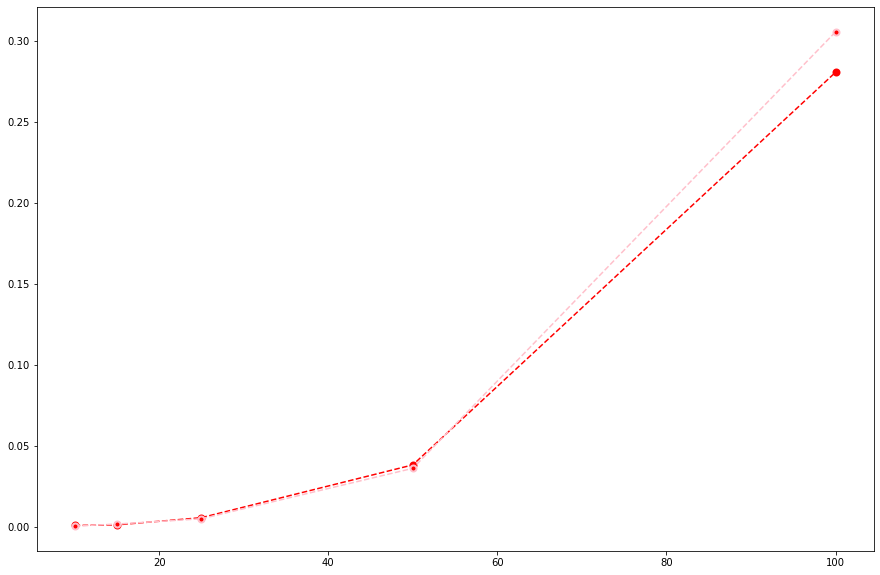

In [151]:
x = [10, 15, 25, 50, 100]
y = [0.0008993406295776368,0.0012524688243865966, 0.005702060222625732, 0.038260842561721804, 0.28047805762290956] #my algorithm
z = [0.000500751256942749, 0.0017526607513427734, 0.005013889551162719, 0.03614046788215637, 0.305418753862381] #inner algorithm
plt.figure(figsize=(15, 10))
plt.plot(x, y, color='red', linestyle='--', marker='o', markerfacecolor='red', markeredgewidth=2)
plt.plot(x, z, color='pink', linestyle='--', marker='o', markerfacecolor='red', markeredgewidth=2)
plt.show()


##### From the graph built with the help of measurements, it can be seen that at small values, the algorithms work at almost the same speed, and the larger the number of edges, the shorter the time of my algorithm becomes.